In [1]:
#Load the libraries that we need
from scipy import stats
import pandas as pd
import numpy as np


In [2]:
#load the data
dsa = pd.read_csv('train.csv')

#view the data
dsa.head()

id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
0   0              120.0     24.0       6.9     0.314        7.1   
1   1              140.0     41.0      11.0     0.150        6.5   
2   2              160.0     51.0       9.0     0.450        9.1   
3   3               46.0     13.0       2.9     0.120        2.7   
4   4              240.0    147.0      70.0     0.600       48.0   

   Nitrate as N  Sodium  Specific Conductivity  Sulfate  \
0         0.498    48.0                  510.0     23.2   
1         0.950    19.0                  300.0      8.5   
2         2.500    12.0                  370.0     25.0   
3         0.430     6.4                  110.0      5.0   
4         6.800    93.0                 1410.0    418.0   

   Total Dissolved Solids  Hardness  
0                   240.0      90.4  
1                   190.0     130.0  
2                   230.0     160.0  
3                    97.0      41.0  
4                   950.0     586.0

In [3]:
#calculate the percentile for Sodium
persentil = np.percentile(dsa['Sodium'], 75)
print(persentil)

60.0


In [4]:
#Rename column
dsa.rename(columns = {'Alkalinity, total' : 'Alkalinity'}, inplace = True)

#Calculate the mean of Alkalinity
malkanity = dsa['Alkalinity'].mean()
print(malkanity)

167.15104687499996


In [5]:
#finding value for the value of Sodium up to 0.75 from precentile and above of the mean of Alkalinity
newvalue =dsa[(dsa['Sodium'] > persentil) & (dsa['Alkalinity'] > malkanity)]

print(newvalue)

        id  Alkalinity  Calcium  Chloride  Fluoride  Magnesium  Nitrate as N  \
4        4       240.0   147.00      70.0      0.60     48.000         6.800   
9        9       256.0    77.67     120.0      0.16     28.990         1.800   
12      12       280.0    90.00      31.0      2.10     37.000         3.800   
13      13       190.0    69.00     240.0      0.94      6.200         2.700   
18      18       242.0    98.10     138.0      0.40     30.300         1.200   
...    ...         ...      ...       ...       ...        ...           ...   
6377  6377       180.0   130.00     420.0      0.11     49.000         0.610   
6390  6390       230.0   110.00     130.0      0.31     37.013         5.625   
6391  6391       170.0    45.00      54.0      0.62     11.000         1.300   
6394  6394       240.0   135.00      57.0      0.70     47.000         2.900   
6398  6398       210.0   110.00     190.0      0.23     47.000         7.900   

      Sodium  Specific Conductivity  Su

In [6]:
#mean of Hardness
mhardness = newvalue['Hardness'].mean()
print(mhardness)

383.0833134765625


In [7]:
#find outlier with describe the column
dsa.describe()[['Alkalinity']]

Alkalinity
count  6400.000000
mean    167.151047
std      83.157803
min      12.000000
25%     110.000000
50%     153.500000
75%     209.000000
max    1000.000000

In [8]:
#find outlier with scatter plot
def find_outlier(dsa):
    q1 = dsa.quantile(0.25)
    q3 = dsa.quantile(0.75)
    IQR = q3-q1
    
    outliers = dsa[((dsa < (q1-1.5*IQR)) | (dsa > (q3+1.5*IQR)))]
    return outliers

outliers = find_outlier(dsa['Alkalinity'])
print("number of outliers :" + str(len(outliers)))
print("max outlier value:" + str(outliers.max()))
print("min outlier value:" + str(outliers.min())) 

number of outliers :174
max outlier value:1000.0
min outlier value:358.0


In [9]:
dsa.head()

id  Alkalinity  Calcium  Chloride  Fluoride  Magnesium  Nitrate as N  \
0   0       120.0     24.0       6.9     0.314        7.1         0.498   
1   1       140.0     41.0      11.0     0.150        6.5         0.950   
2   2       160.0     51.0       9.0     0.450        9.1         2.500   
3   3        46.0     13.0       2.9     0.120        2.7         0.430   
4   4       240.0    147.0      70.0     0.600       48.0         6.800   

   Sodium  Specific Conductivity  Sulfate  Total Dissolved Solids  Hardness  
0    48.0                  510.0     23.2                   240.0      90.4  
1    19.0                  300.0      8.5                   190.0     130.0  
2    12.0                  370.0     25.0                   230.0     160.0  
3     6.4                  110.0      5.0                    97.0      41.0  
4    93.0                 1410.0    418.0                   950.0     586.0

<AxesSubplot:xlabel='Specific Conductivity', ylabel='Hardness'>

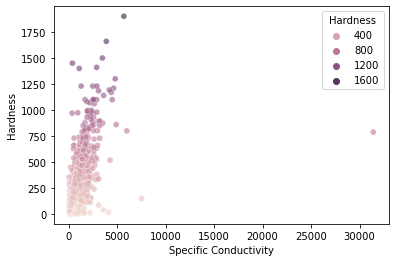

In [10]:
#correlation between two variables (Specific Conductivity & Hardness) using Seaborn
import matplotlib.pyplot as vis
import seaborn as sns
sns.scatterplot(hue='Hardness',x='Specific Conductivity', y='Hardness', alpha=0.6, data = dsa)

<AxesSubplot:>

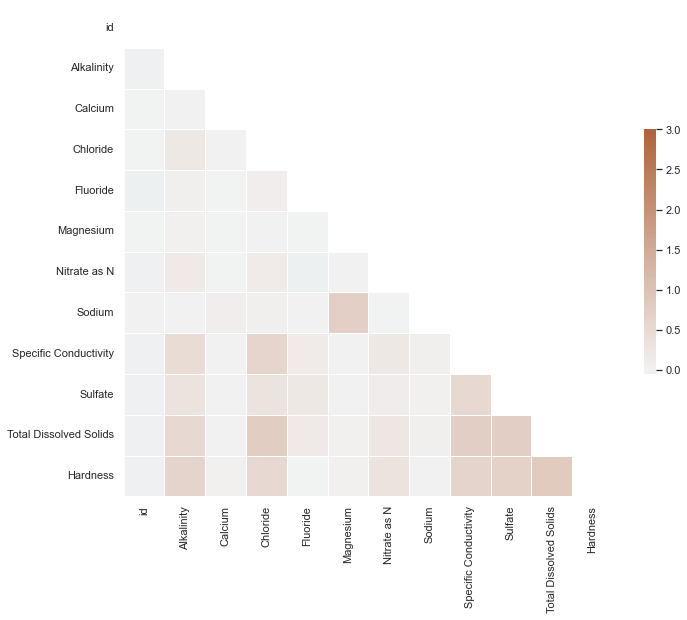

In [11]:
#finding correlation
sns.set_theme(style="white")

corr = dsa.corr()
mask = np.triu(np.ones_like(corr, dtype= bool))
d, ax= vis.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 30, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink" : .5})



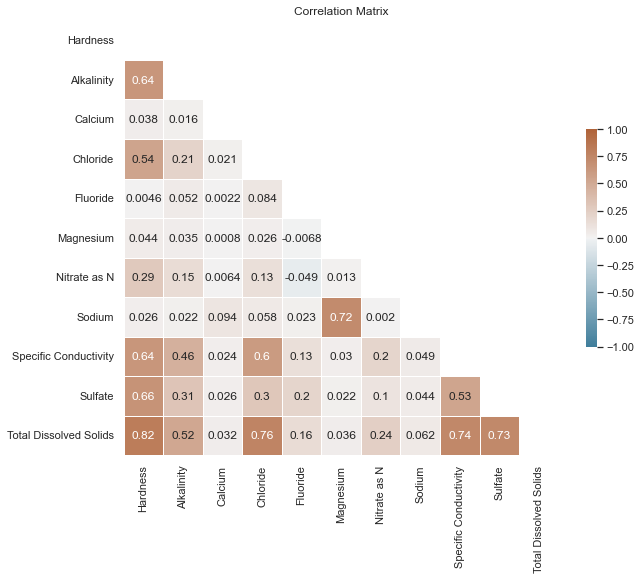

In [12]:
columns = ['Hardness', 'Alkalinity', 'Calcium', 'Chloride','Fluoride','Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']
dt = dsa[columns]

correlation = dt.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
vis.figure(figsize=(10,8))

#cmap = sns.diverging_palette(270, 30, s=100, l=50, as_cmap=True)
sns.heatmap(correlation, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0,
            square= True, linewidths=.5, cbar_kws={'shrink' : .5})

vis.title('Correlation Matrix')
vis.show()

In [13]:
dsaa = dsa.astype('int64')
print(dsaa.dtypes)

id                        int64
Alkalinity                int64
Calcium                   int64
Chloride                  int64
Fluoride                  int64
Magnesium                 int64
Nitrate as N              int64
Sodium                    int64
Specific Conductivity     int64
Sulfate                   int64
Total Dissolved Solids    int64
Hardness                  int64
dtype: object


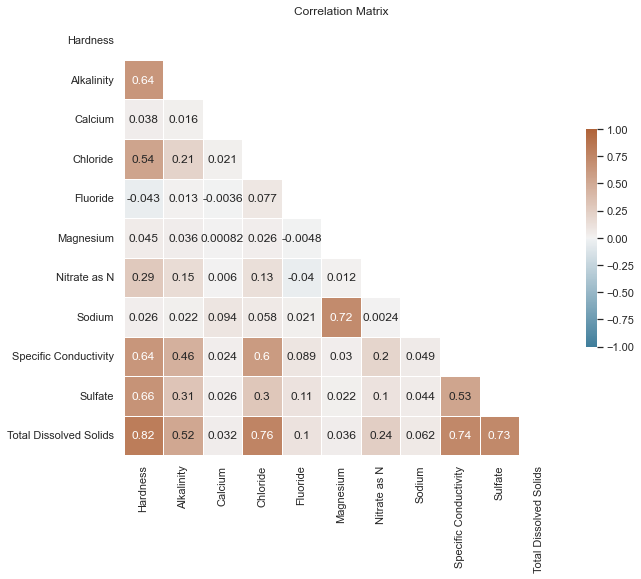

In [14]:
columns = ['Hardness', 'Alkalinity', 'Calcium', 'Chloride','Fluoride','Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']
dt = dsaa[columns]

correlation = dt.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
vis.figure(figsize=(10,8))

#cmap = sns.diverging_palette(270, 30, s=100, l=50, as_cmap=True)
sns.heatmap(correlation, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0,
            square= True, linewidths=.5, cbar_kws={'shrink' : .5})

vis.title('Correlation Matrix')
vis.show()

In [17]:
#filtering columns
filtern = dsaa[['Hardness', 'Alkalinity', 'Calcium', 'Chloride','Fluoride','Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']]
filtern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Hardness                6400 non-null   int64
 1   Alkalinity              6400 non-null   int64
 2   Calcium                 6400 non-null   int64
 3   Chloride                6400 non-null   int64
 4   Fluoride                6400 non-null   int64
 5   Magnesium               6400 non-null   int64
 6   Nitrate as N            6400 non-null   int64
 7   Sodium                  6400 non-null   int64
 8   Specific Conductivity   6400 non-null   int64
 9   Sulfate                 6400 non-null   int64
 10  Total Dissolved Solids  6400 non-null   int64
dtypes: int64(11)
memory usage: 550.1 KB


In [22]:

#partitioning data
from sklearn.model_selection import train_test_split

def split_train_test(filtern, test_ratio):
    shuffled = np.random.permutation(len(filtern))
    test_data = int(len(filtern) * test_ratio)
    test_indicies = shuffled[:test_data]
    train_indicies = shuffled[test_data:]
    return filtern.iloc[train_indicies], filtern.iloc[test_indicies]
train_data, test_data = split_train_test(filtern, 0.2)
print(f'Train data set count {len(train_data)}\n Test data set count {len(test_data)}')

Train data set count 5120
 Test data set count 1280


In [27]:
%pip install scikit-learn pandas sklearn2pmml

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.109.0-py3-none-any.whl size=7174006 sha256=a99d71b50ba11a931c462976e14ef355b2347c32a2685c73b1fdf8080502348f
  Stored in directory: c:\users\arief\appdata\local\pip\cache\wheels\d2\c5\87\92253d334b90e1833b420bd278e62dfaef2ed75b410b3136f0
Successfully built sklearn2pmml
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [35]:

#linear regression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



x_train = train_data.drop('Hardness', axis = 1)
y_train = train_data['Hardness']
x_test = test_data.drop('Hardness', axis=1)
y_test = test_data['Hardness']

reg_all = LinearRegression()
reg_all.fit(x_train, y_train)
y_pred = reg_all.predict(x_test)

#Fit the pipeline with training data
reg_all.fit(x_train, y_train)

y_pred = reg_all.predict(x_test)

print("R^2: {}".format(reg_all.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))




R^2: 0.754022989342107
Root Mean Squared Error: 85.98223518370621


In [45]:
#random forest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn2pmml import PMMLPipeline, sklearn2pmml
import pickle

# Create and train the PMML pipeline
pipeline = PMMLPipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline with training data
pipeline.fit(x_train, y_train)

# Predict using the test set
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

# Calculate R² for training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'R² for training set: {r2_train}')
print(f'R² for test set: {r2_test}')

# Save the PMML model
model_pkl = "random_forest.pkl"
with open(model_pkl, 'wb') as file:
    pickle.dump(pipeline, file)

R² for training set: 0.9875347060246363
R² for test set: 0.8947850444918231
